## This notebook is to tune hyperparameters of random forest using GridSearchCV

### The result as follows
- R2 test:  0.84
- RMSE test: 1697.04
- R2 train:  0.87
- RMSE train: 1504.47

### Top 10 features, ranked by importance
- vehicle_mileage	0.24481
- vehicle_style_id	0.14774
- vehicle_chrome_trim_id	0.13742
- vehicle_year	0.11706
- vehicle_mpg_combined	0.08150
- vehicle_drive_train_FWD	0.05226
- vehicle_model_id	0.05205
- vehicle_make_id	0.02312
- vehicle_body_style_pickup-truck	0.01584
- vehicle_body_style_suv 0.01577

In [41]:
import warnings
import pandas as pd
import numpy as np
from time import time as T
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%run "../data_processing/vizi"

In [59]:
###read dataset
df = pd.read_csv('featuressimple.csv')

In [60]:
X = df.drop('vehicle_list_price',axis =1)
y = df.vehicle_list_price

### Train test splits
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)
#random forest regressor
reg_rfr = RandomForestRegressor(random_state=42)

### Hyperparameters tuning using GridSearchCV

In [67]:
#parameter grids
params =dict(
n_estimators=[200],
criterion=['mse'],
max_depth=[5,10,15,20,25,30,35,40,45],
min_samples_split=[2,5,7,9,11,13,15,17],
max_features=['sqrt'],
n_jobs=[-1],
verbose=[1])

In [68]:
grid = GridSearchCV(estimator=reg_rfr,
                    param_grid=params,
                    scoring = 'neg_mean_squared_error',
                    cv=5,
                    n_jobs=-1,return_train_score= True)

In [69]:
start = T()
grid.fit(X_train,y_train)
print(f"Finished in {T() - start:.2f} seconds")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.5s


Finished in 2567.15 seconds


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.0s finished


In [111]:
def show_cv_results(grid):
    rmse_test = np.sqrt(-grid.cv_results_['mean_test_score'])
    rmse_train =np.sqrt(-grid.cv_results_['mean_train_score'])        
    grid_cv_df = pd.DataFrame({'rmse_valid':rmse_test, 'rmse_train':rmse_train})
    grid_cv_df['diff'] = rmse_test-rmse_train
    grid_cv_df['params'] = grid.cv_results_['params']     
    return grid_cv_df

def show_grid_cv(grid,para = None,para_name = None):
    RMSE_train = np.sqrt(-grid.cv_results_['mean_train_score'])
    RMSE_test = np.sqrt(-grid.cv_results_['mean_test_score'])
    if para_name:
        fig=plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.plot(para,RMSE_train,label='Train loss')
        ax.plot(para,RMSE_test,label = 'Validation loss')
        ax.legend(loc=0)
        plt.title('Root mean square error over {}'.format(para_name))
        plt.xlabel(para_name)
        plt.ylabel('rmse')
        plt.show
    else:
        fig=plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.plot(RMSE_train,label='Train loss')
        ax.plot(RMSE_test,label = 'Validation loss')
        ax.legend(loc=0)
        plt.title('Root mean square error')
        plt.xlabel('parameters set')
        plt.ylabel('rmse')
        plt.show

In [112]:
df_train_test = show_cv_results(grid)

In [113]:
df_train_test[15:30]

,rmse_valid,rmse_train,diff,params
15,2039.651160,1979.060757,60.590402,"{'criterion': 'mse', 'max_depth': 10, 'max_fea..."
16,1682.976511,1350.734568,332.241943,"{'criterion': 'mse', 'max_depth': 15, 'max_fea..."
17,1691.019425,1388.029515,302.989909,"{'criterion': 'mse', 'max_depth': 15, 'max_fea..."
18,1694.995222,1411.096407,283.898815,"{'criterion': 'mse', 'max_depth': 15, 'max_fea..."
19,1700.726416,1432.966096,267.760320,"{'criterion': 'mse', 'max_depth': 15, 'max_fea..."
20,1708.424604,1454.654566,253.770038,"{'criterion': 'mse', 'max_depth': 15, 'max_fea..."
21,1711.837994,1471.040376,240.797618,"{'criterion': 'mse', 'max_depth': 15, 'max_fea..."
22,1715.840315,1484.473839,231.366476,"{'criterion': 'mse', 'max_depth': 15, 'max_fea..."
23,1722.993165,1501.274759,221.718406,"{'criterion': 'mse', 'max_depth': 15, 'max_fea..."
24,1516.212712,819.363132,696.849580,"{'criterion': 'mse', 'max_depth': 20, 'max_fea..."


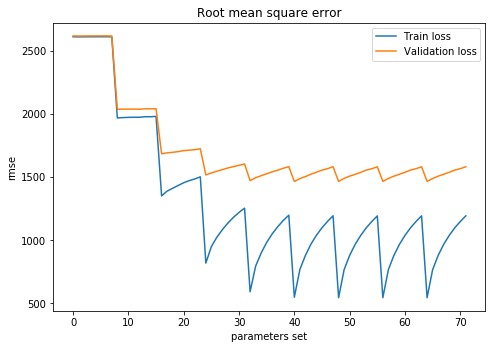

In [114]:
show_grid_cv(grid)

### Pick a parameter set that reduce the gap between train score and test score.

In [115]:
grid.cv_results_['params'][23]

{'criterion': 'mse',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 17,
 'n_estimators': 200,
 'n_jobs': -1,
 'verbose': 1}

In [108]:
param = {'criterion': 'mse',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 17,
 'n_estimators': 200,
 'n_jobs': -1,
 'verbose': 1}

reg_rfr = RandomForestRegressor(**param)
reg_rfr.fit(X_train,y_train)
y_pred = reg_rfr.predict(X_test)
y_pred_train = reg_rfr.predict(X_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    6.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.7s finished


In [109]:
print(f"R2 test: {r2_score(y_test,y_pred): .2f}")
print(f"RMSE test: {np.sqrt(mean_squared_error(y_test,y_pred)):.2f}")
print(f"R2 train: {r2_score(y_train,y_pred_train): .2f}")
print(f"RMSE train: {np.sqrt(mean_squared_error(y_train,y_pred_train)):.2f}")

R2 test:  0.84
RMSE test: 1697.04
R2 train:  0.87
RMSE train: 1504.47


### Show feature importance

In [124]:
df_feature_importance= pd.DataFrame({"features": X_train.columns,
              "importance":reg_rfr.feature_importances_}).round(5)
df_feature_importance = df_feature_importance.sort_values('importance')

In [1]:
#plot_bar_v(df_feature_importance,title_="feature importance",
#          x_axis='importance',
#          y_axis='features')

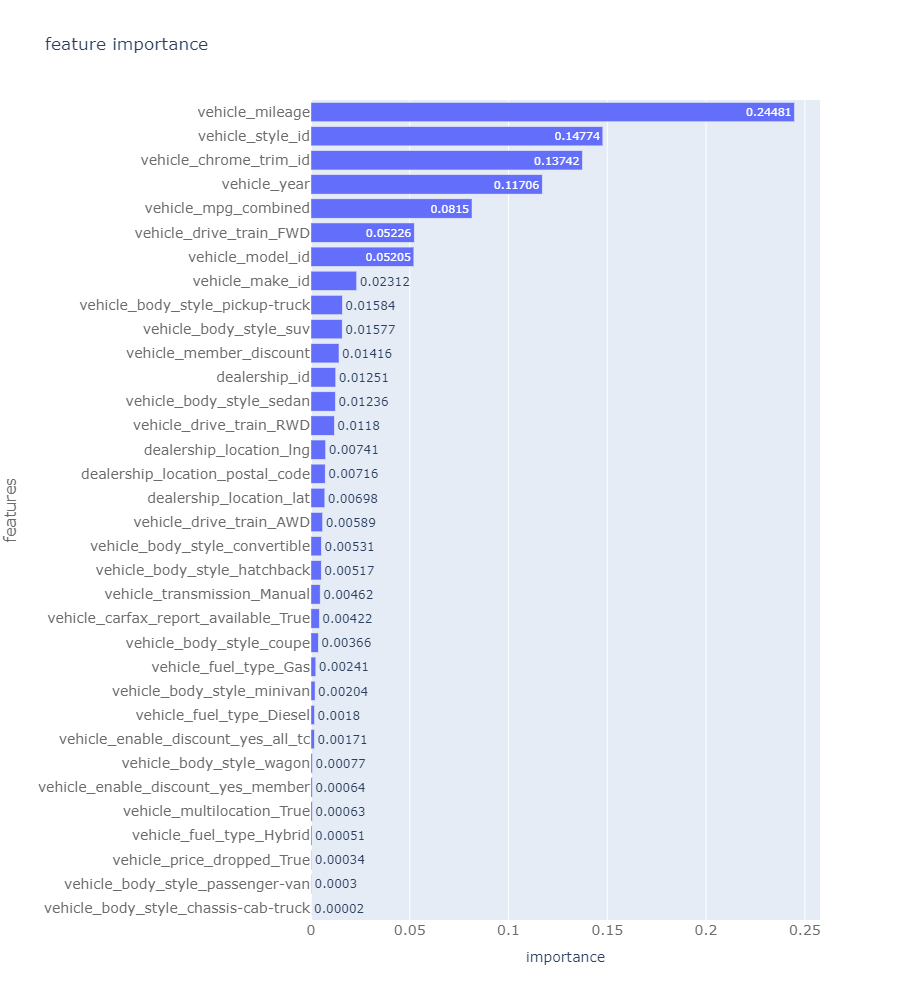

In [2]:
from IPython.display import Image
Image(filename = 'feature_importance.png')